In [2]:
# 🧠 Breast Cancer Diagnosis Dataset - Explanation

# This dataset contains medical information about breast tumors. Each row represents a **tumor case**, 
# and the goal is to **predict whether a tumor is malignant (cancerous) or benign (non-cancerous)**.

## ✅ Key Columns:

# - `id`: Unique identifier for each patient case (not useful for prediction).
# - `diagnosis`: This is the **target column**:
#  - **M** = Malignant (cancerous) 🛑
#  - **B** = Benign (non-cancerous) ✅

#- `radius_mean`, `texture_mean`, `area_mean`, etc.: These are measurements taken from images of the cell nuclei.
#- `..._worst`: These columns show the **worst (most extreme)** values for each feature.
#- `Unnamed: 32`: An empty column that contains only NaN values — it should be dropped.

## 🧪 Goal:
# To build a machine learning model that can learn from the measurements and **predict whether a tumor is benign or malignant**.

## 🧰 Data Type:
# This is a **binary classification problem**, but for learning purposes, we can apply **Linear Regression** 
#and later compare it with Logistic Regression or Decision Trees.

## 📌 Preprocessing Steps:
# 1. Drop `id` and `Unnamed: 32` (not useful).
# 2. Convert `diagnosis` to numeric: **M → 1**, **B → 0**
# 3. Use the rest of the columns as features for the model.



In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [6]:
df = pd.read_csv("data.csv")

In [7]:
# Drop unwanted columns
df = df.drop(['id', 'Unnamed: 32'], axis=1)

In [8]:
# Convert diagnosis to binary (M = 1, B = 0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [9]:
# 2: Split Data into Features and Target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [10]:
# Train-Test Split and Standardization
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [13]:
# Predict and Evaluate
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probability for class 1

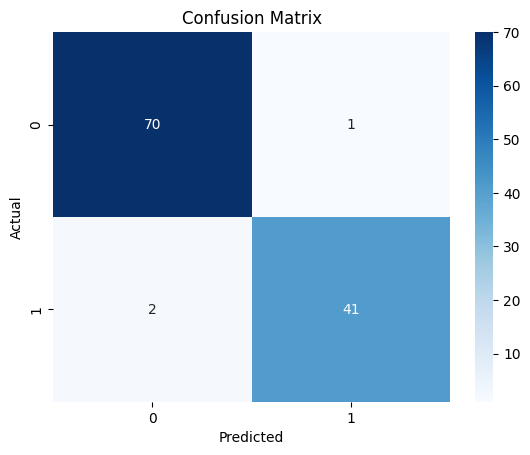

In [14]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [15]:
# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [16]:
# ROC-AUC Score
roc_score = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", round(roc_score, 4))

ROC-AUC Score: 0.9974


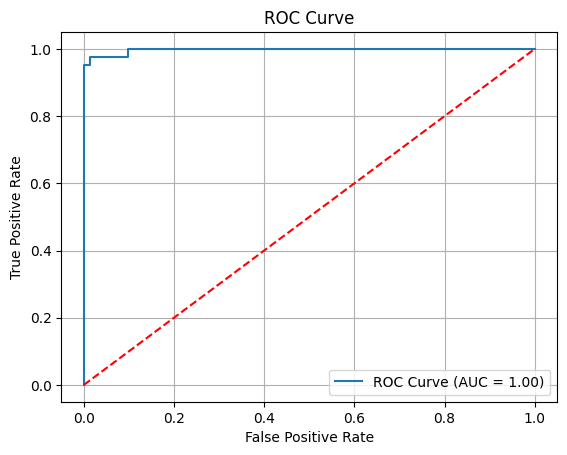

In [18]:
#  ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_score:.2f})")
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

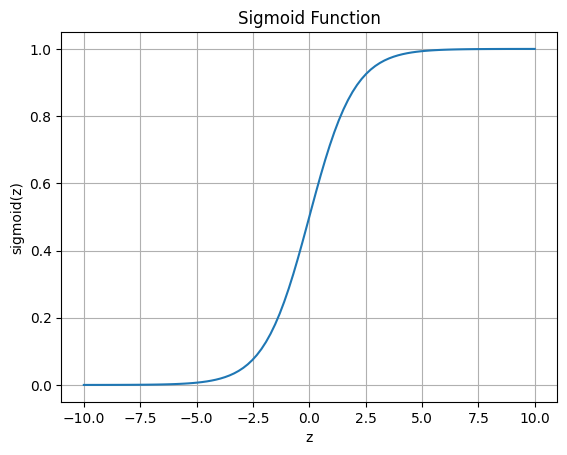

In [19]:
# Sigmoid Function & Threshold Tuning

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)
s = sigmoid(z)
plt.plot(z, s)
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.grid(True)
plt.show()

In [20]:
# Custom threshold
custom_threshold = 0.6
y_custom_pred = (y_prob >= custom_threshold).astype(int)
print("\nClassification Report at Threshold = 0.6:")
print(classification_report(y_test, y_custom_pred))


Classification Report at Threshold = 0.6:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [21]:
# Now we will predict whether a new patient’s tumor is malignant (1) or benign (0) based on medical features

In [25]:
import pandas as pd

# Step 1: Create new data in the same format as training features
new_data = pd.DataFrame([{
    'radius_mean': 15.0,
    'texture_mean': 20.0,
    'perimeter_mean': 100.0,
    'area_mean': 700.0,
    'smoothness_mean': 0.1,
    'compactness_mean': 0.15,
    'concavity_mean': 0.2,
    'concave points_mean': 0.1,
    'symmetry_mean': 0.2,
    'fractal_dimension_mean': 0.06,
    'radius_se': 0.5,
    'texture_se': 1.0,
    'perimeter_se': 3.0,
    'area_se': 40.0,
    'smoothness_se': 0.01,
    'compactness_se': 0.02,
    'concavity_se': 0.03,
    'concave points_se': 0.01,
    'symmetry_se': 0.02,
    'fractal_dimension_se': 0.003,
    'radius_worst': 18.0,
    'texture_worst': 25.0,
    'perimeter_worst': 120.0,
    'area_worst': 1000.0,
    'smoothness_worst': 0.14,
    'compactness_worst': 0.25,
    'concavity_worst': 0.3,
    'concave points_worst': 0.15,
    'symmetry_worst': 0.3,
    'fractal_dimension_worst': 0.08
}])

# Step 2: Scale the data using the same scaler used during training
new_data_scaled = scaler.transform(new_data)

# Step 3: Predict the class (0 = Benign, 1 = Malignant)
prediction = model.predict(new_data_scaled)
probability = model.predict_proba(new_data_scaled)[0][1]

# Step 4: Show the result
print("Prediction (0 = Benign, 1 = Malignant):", prediction[0])
print("Probability of being malignant:", round(probability, 2))


Prediction (0 = Benign, 1 = Malignant): 1
Probability of being malignant: 0.99


In [28]:
# or also we can fetch data from our files

In [26]:
new_data = pd.read_excel("Test.xlsx")

new_data_scaled = scaler.transform(new_data)

# Step 3: Predict the class (0 = Benign, 1 = Malignant)
prediction = model.predict(new_data_scaled)
probability = model.predict_proba(new_data_scaled)[0][1]

# Step 4: Show the result
print("Prediction (0 = Benign, 1 = Malignant):", prediction[0])
print("Probability of being malignant:", round(probability, 2))

Prediction (0 = Benign, 1 = Malignant): 1
Probability of being malignant: 0.99
